In [21]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [23]:
# Reshape label arrays
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [24]:
# Define class names
classes = ["airplane", "automobile", "bird", "cat", "deer",
           "dog", "frog", "horse", "ship", "truck"]

In [25]:
# Function to plot sample image
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

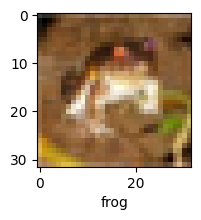

In [26]:
plot_sample(X_train, y_train, 0)

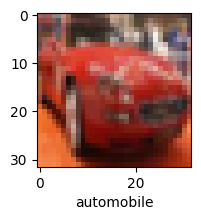

In [27]:
plot_sample(X_train, y_train, 5)

In [28]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [29]:
# Split training data into train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [30]:
# CNN model
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [32]:
# Train model with validation
print("Training CNN model...")
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Training CNN model...
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3421 - loss: 1.7832 - val_accuracy: 0.5256 - val_loss: 1.3268
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5565 - loss: 1.2569 - val_accuracy: 0.5631 - val_loss: 1.2138
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6195 - loss: 1.0765 - val_accuracy: 0.6339 - val_loss: 1.0436
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6671 - loss: 0.9479 - val_accuracy: 0.6568 - val_loss: 0.9760
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6946 - loss: 0.8659 - val_accuracy: 0.6765 - val_loss: 0.9388
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7182 - loss: 0.8010 - val_accuracy: 0.6838 - val_loss: 0.9198
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7430 - loss: 0.7388 - val_accuracy: 0.6947 - val_loss: 0.8868
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.

In [33]:
# Evaluate on test set
print("\nEvaluating on test data...")
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Evaluating on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6913 - loss: 0.9287
Test Accuracy: 68.86%


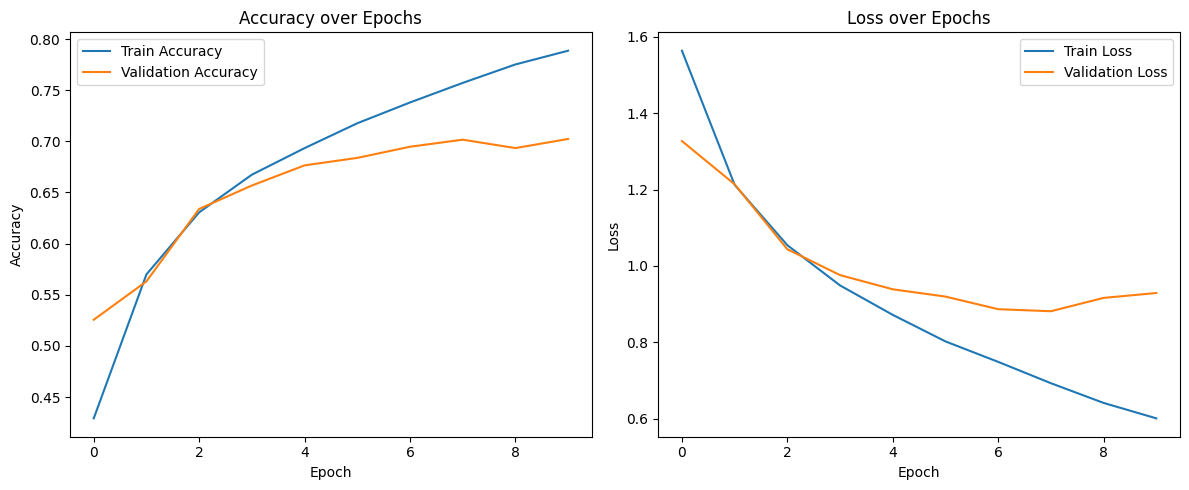

In [34]:
def plot_history(history):
    plt.figure(figsize=(12,5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


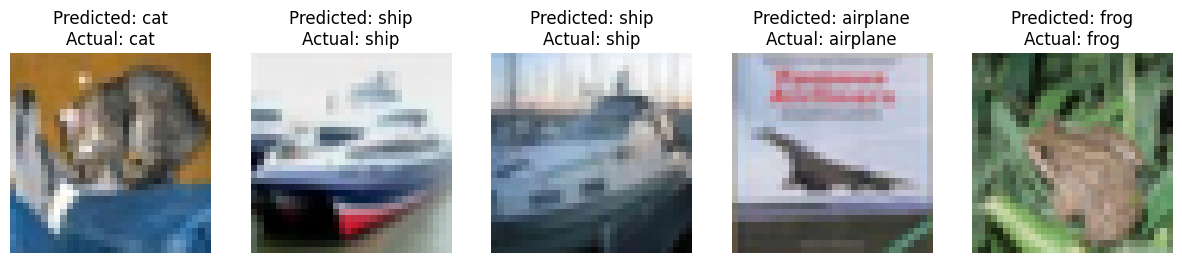

In [35]:
# Predict and visualize results on test images
def show_predictions(model, X, y, num=5):
    predictions = model.predict(X[:num])
    pred_classes = np.argmax(predictions, axis=1)

    plt.figure(figsize=(15,3))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(X[i])
        plt.title(f"Predicted: {classes[pred_classes[i]]}\nActual: {classes[y[i]]}")
        plt.axis('off')
    plt.show()

show_predictions(cnn, X_test, y_test, num=5)